<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Роман!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» каждый месяц стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нам нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель исследования:**

Построить модель с предельно большим значением *F1*-меры.

**Ход исследования:** 

Данные о поведении клиентов получим из файлов `Churn.csv`. О качестве данных ничего не известно. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке самостоятельно. Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Таким образом, исследование пройдёт в шесть этапов:
 1. Подготовка данных.
 2. Исследование задачи.
 3. Борьба с дисбалансом.
 4. Тестирование модели.
 5. Общий вывод.



Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Загрузим и подготовьте данные. Поясним порядок действий:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все импорты в одном месте, удобно :)</div>

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
data.duplicated().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

Посчитаем процент пропуска данных в столбцах:

In [7]:

pd.DataFrame(data.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
tenure,9.090000
exited,0.000000
estimatedsalary,0.000000
isactivemember,0.000000
hascrcard,0.000000
numofproducts,0.000000
balance,0.000000
age,0.000000
gender,0.000000
geography,0.000000


In [8]:
data['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [9]:
data.query('tenure < 1')

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0.0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,France,Male,46,0.0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,Germany,Male,24,0.0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,France,Female,43,0.0,93143.39,1,1,0,167554.86,0


Заменять сколько лет человек является клиентом банка средним числом будет неправильным решением. Поэтому dummy признак - "11".

In [10]:
data['tenure'].fillna(11, inplace=True)

Проверим значения с заглушкой "11", возможно получится найти закономерность отсутствия данных:

In [11]:
data.query("tenure > 10").head(15)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,11.0,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,11.0,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,11.0,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,11.0,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,11.0,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,11.0,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,11.0,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,11.0,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,11.0,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,11.0,108055.10,2,1,0,27231.26,0


Очевидной связи всех данных датасета и отсутствия данных в колонке `tenure` не наблюдается. Поэтому включим заглушку, потеряв около 9% общих данных. Необходимо обратиться к заказчику, чтобы по возможности восполнить данные пропуски.

In [12]:
data = data.query('tenure < 11')
data.reset_index(drop=True)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9087,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9088,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9089,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, хоть мы и теряем ощутимую часть данных, заполнение может исказить распределение признака</div>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        9091 non-null   int64  
 1   customerid       9091 non-null   int64  
 2   surname          9091 non-null   object 
 3   creditscore      9091 non-null   int64  
 4   geography        9091 non-null   object 
 5   gender           9091 non-null   object 
 6   age              9091 non-null   int64  
 7   tenure           9091 non-null   float64
 8   balance          9091 non-null   float64
 9   numofproducts    9091 non-null   int64  
 10  hascrcard        9091 non-null   int64  
 11  isactivemember   9091 non-null   int64  
 12  estimatedsalary  9091 non-null   float64
 13  exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Избавимся от лишней информации в датасете. Удалим столбцы `rownumber`, `surname`, `customerid`.

In [14]:
data = data.drop(['rownumber', 'surname', 'customerid'], axis=1)
data.head(10)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, эти признаки для моделей не информативны</div>

Применим порядковое кодирование к категориальным признакам `geography`, `gender`:

In [15]:
category = ['geography', 'gender']

In [16]:
encoder = OrdinalEncoder()
encoder.fit(data[category])
data[category] = encoder.transform(data[category])

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, порядковое кодирование здесь вполне подходит</div>

In [17]:
data.head(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0


## Исследование задачи

Исследуем баланс классов, обучиим модель без учёта дисбаланса. Кратко опишем выводы.

Посмотрим на соотношение классов в выборке:

Есть дисбаланс.

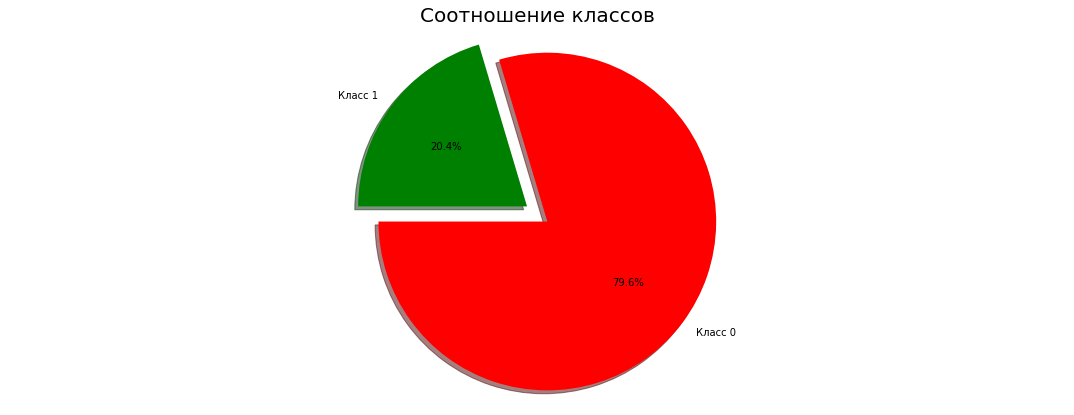

In [18]:
plt.figure(figsize=(19, 7))
labels = ['Класс 0','Класс 1']
values = data.exited.value_counts(normalize=True)
colors = ['red','green']
explode = [0.15,0]
plt.title('Соотношение классов', size=20)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, жуткий дисбаланс</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для наглядности стоит добавить график: например, столбчатую или круговую диаграмму. Также методу <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html">value_counts</a> можно передать параметр `normalize=True`, чтобы отобразить не количество объектов, а их относительную долю</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Привет! Спасибо за проверку работы, исправил
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Проверим данные на наличие сильно-скоррелированных (мультиколлинеарных признаков превышающих порог в 0.95):

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,0.002025,-0.008547,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
geography,0.002025,1.000000,0.003609,0.019889,-0.000888,0.068037,0.007444,-0.013748,0.006610,-0.005410,0.035152
gender,-0.008547,0.003609,1.000000,-0.025631,0.012634,0.018030,-0.025176,0.006016,0.025019,-0.002658,-0.110450
age,-0.004504,0.019889,-0.025631,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
tenure,-0.000062,-0.000888,0.012634,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
balance,0.002804,0.068037,0.018030,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
numofproducts,0.011090,0.007444,-0.025176,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
hascrcard,-0.003937,-0.013748,0.006016,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
isactivemember,0.030947,0.006610,0.025019,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
estimatedsalary,0.005182,-0.005410,-0.002658,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029


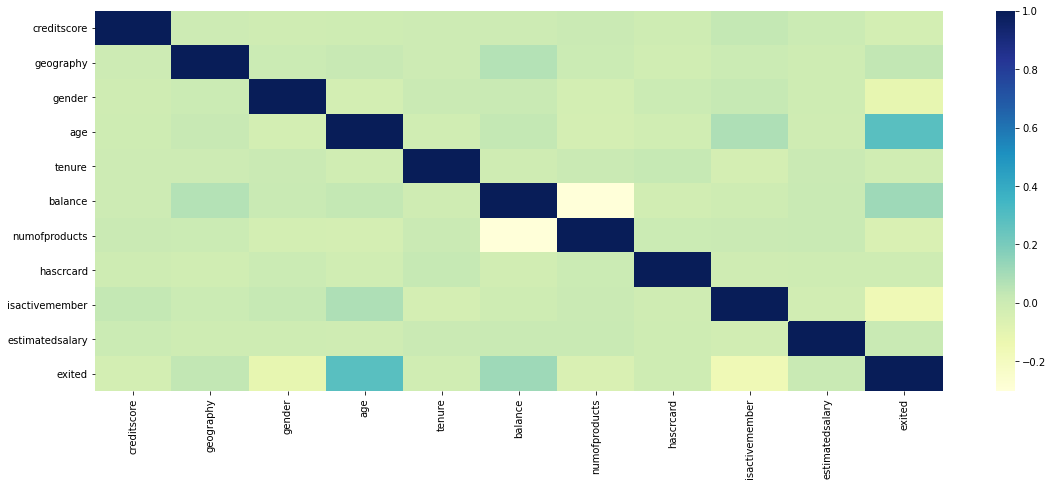

In [19]:
plt.figure(figsize=(19, 7))
data_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)  


plt.show()

Сильно-скоррелированных не обнаружено.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: молодец, что изучаешь матрицу корреляций!</div>

Разобьём датафрейм на две выборки с обычными признаками и целевым.

In [20]:
target = data['exited']
features = data.drop('exited', axis=1)

Раздели выборки на обучающую, валидационную и тестовую в процентном соотношении 60/20/20 соответсвенно, сохранив при этом дисбаланс классов.

Используем параметр `stratify`, чтобы решить проблему несбалансированных классов:

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: с размерами выборок все окей :) Круто, что знаешь про stratify!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: значение random_state лучше вынести в константу, например, RANDOM_STATE. Это общее правило код-стайла не только в Практикуме, а в большинстве языков программирования: мы выносим все константные значения в переменные/константы с читаемым названием и именуем, согласно стандартам PEP-8, заглавными буквами. Так проще читать и дебажить код. Это не обязательное условие, просто полезная привычка на будущее</div>

Проведём численные признаки в трёх  выборках к одному масштабу:

In [22]:
numeric = ['creditscore', 'balance', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.shape)

/tmp/ipykernel_48/576761850.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


(5454, 10)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что не забываешь про масштабирование!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но вообще для «деревянных» классификаторов масштабирование совсем не обязательно, <a href="https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf" target="blank_">тут</a> можно почитать про это подробнее. А вот для линейных моделей наоборот, может заметно улучшить метрики.</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Класс, спасибо за полезную информацию!
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Дисбаланс классов выборках сохранён:

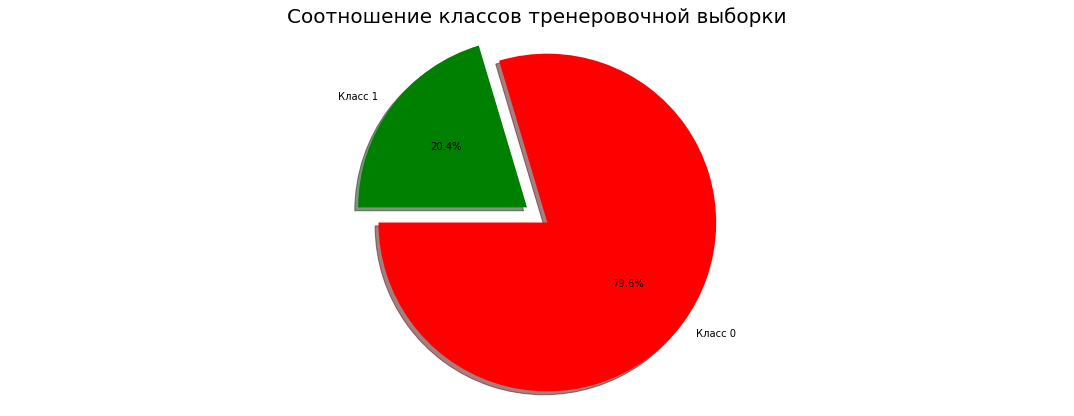

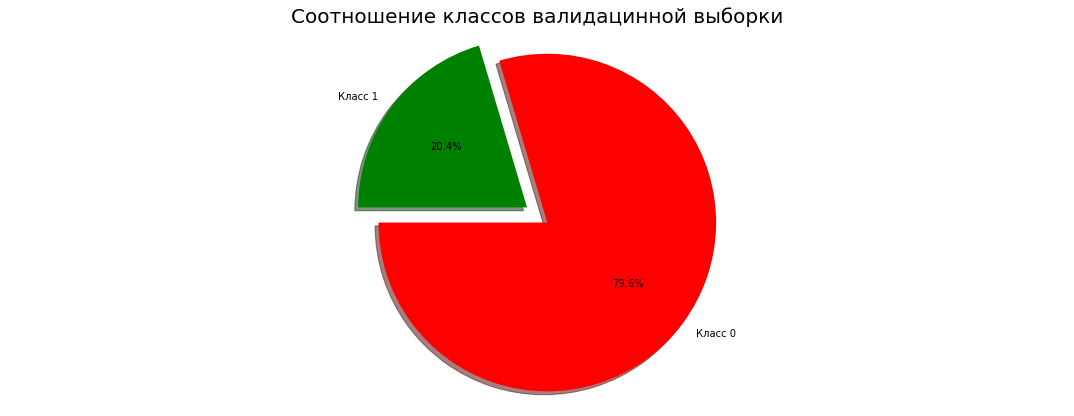

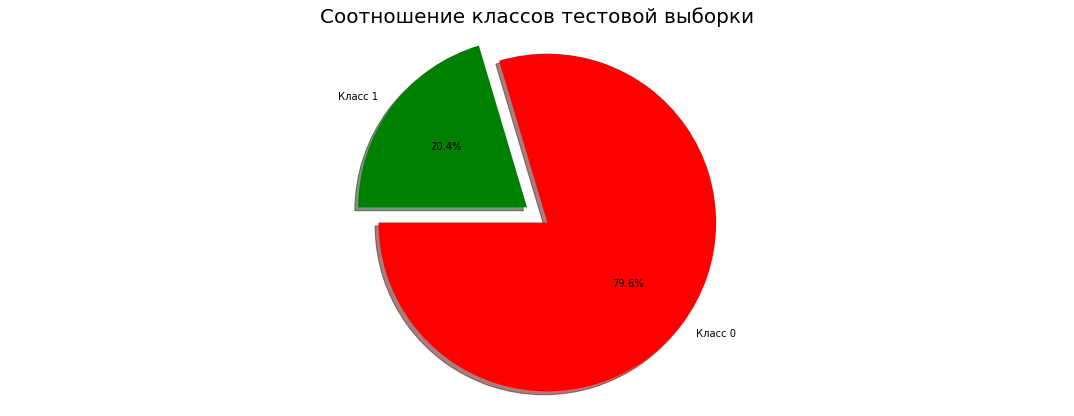

In [23]:
plt.figure(figsize=(19, 7))
labels = ['Класс 0','Класс 1']
values = target_train.value_counts(normalize=True)
colors = ['red','green']
explode = [0.15,0]
plt.title('Соотношение классов тренеровочной выборки', size=20)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

plt.figure(figsize=(19, 7))
labels = ['Класс 0','Класс 1']
values = target_valid.value_counts(normalize=True)
colors = ['red','green']
explode = [0.15,0]
plt.title('Соотношение классов валидацинной выборки', size=20)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

plt.figure(figsize=(19, 7))
labels = ['Класс 0','Класс 1']
values = target_test.value_counts(normalize=True)
colors = ['red','green']
explode = [0.15,0]
plt.title('Соотношение классов тестовой выборки', size=20)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

Обучим модель случайного леса.

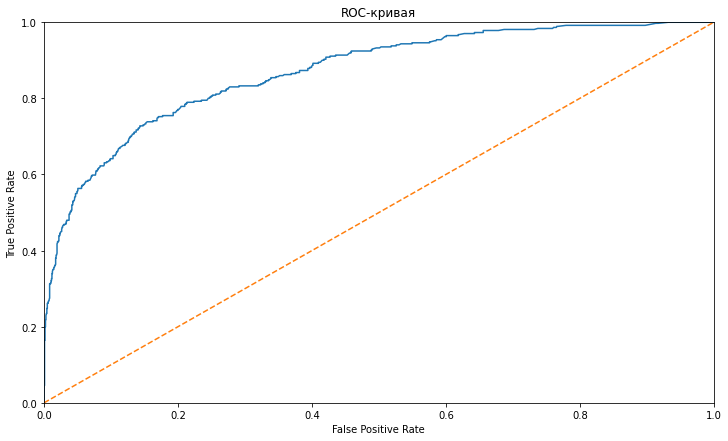

Accuracy: 0.8712871287128713 , количество деревьев:  50 , глубина:  16
Площадь под кривой (AUC-ROC): 0.8696513094291191
Значение лучшей метрики F1: 0.6176470588235294
CPU times: user 1min 18s, sys: 465 ms, total: 1min 19s
Wall time: 1min 19s


In [24]:
%%time


best_model_forest = None
best_result_m1 = 0
best_n_estimators = 0
best_depth = 0


for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predicted_valid = model_forest.predict(features_valid)
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_m1 = f1_score(predicted_valid, target_valid)
        if result_m1 > best_result_m1:
            best_model_forest = model_forest
            best_result_m1 = result_m1
            best_n_estimators = est
            best_depth = depth
            

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_m1 = best_model_forest.score(features_valid, target_valid)
roc_model_1 = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_m1, ", количество деревьев: ",
      best_n_estimators, ", глубина: ", best_depth)
print('Площадь под кривой (AUC-ROC):', roc_model_1)
print('Значение лучшей метрики F1:', best_result_m1)

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: так как основная метрика в этом проекте — F1-мера, то и лучшие гиперпараметры нужно подбирать на основании F1, а не accuracy</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Точно, спасибо! Исправил
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но обрати внимание, что при расчете метрик важно запомнить, что первым аргументом всегда передается целевой признак, а вторым — предсказания, иначе некоторые метрики будут рассчитаны некорректно, а ошибку найти будет не так уж и просто</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: классный график!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но для честного эксперимента стоит проверить все выбранные тобой модели на каждом этапе, в том числе до борьбы с дисбалансом</div>

Обучим модель решающего дерева.

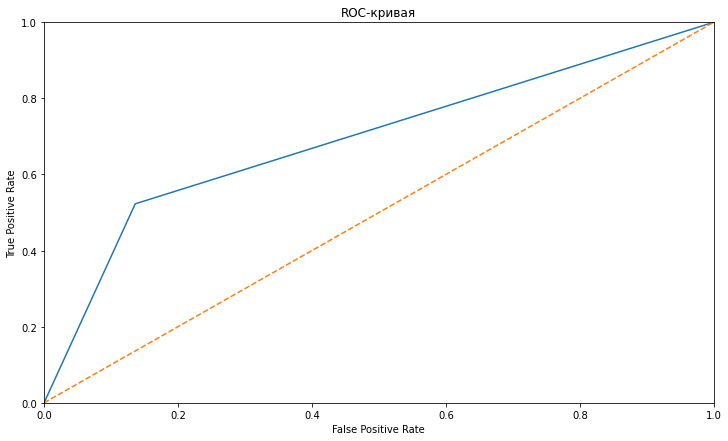

Accuracy: 0.8476347634763476 , глубина:  9
Площадь под кривой (AUC-ROC): 0.6933836527661097
Значение лучшей метрики F1: 0.5436573311367381
CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.52 s


In [25]:
%%time


best_model_tree = None
best_result_m2 = 0
best_depth = 0


for depth in range(1, 100, 2):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predicted_valid = model_tree.predict(features_valid)
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_m2 = f1_score(predicted_valid, target_valid)
    if result_m2 > best_result_m2:
        best_model_tree = model_tree
        best_result_m2 = result_m2
        best_depth = depth
            

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_m2 = best_model_tree.score(features_valid, target_valid)
roc_model_2 = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_m2, ", глубина: ", best_depth)
print('Площадь под кривой (AUC-ROC):', roc_model_2)
print('Значение лучшей метрики F1:', best_result_m2)

## Борьба с дисбалансом

Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдём лучшую. Кратко опишите выводы.

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не совсем понятно, почему ты повторно разбиваешь выборки, нужно пояснить</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Да лишнее действие, стало не актуальным после изменения методов решения задачи. Исправил
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

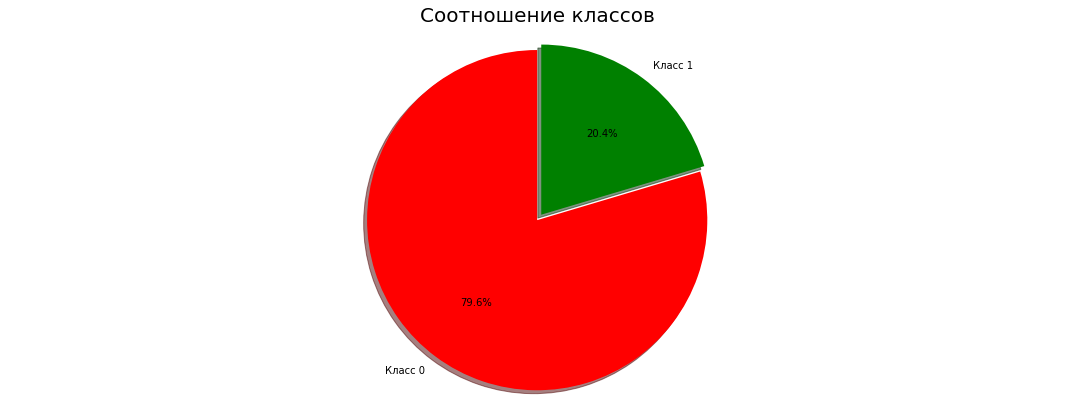

In [26]:
plt.figure(figsize=(19, 7))
labels = ['Класс 0','Класс 1']
values = target_train.value_counts(normalize=True)
colors = ['red','green']
explode = [0.04,0]
plt.title('Соотношение классов', size=20)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

Решим проблему дисбаланса классов увеличением выборки меньшего класса.

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Дислабанс решён:

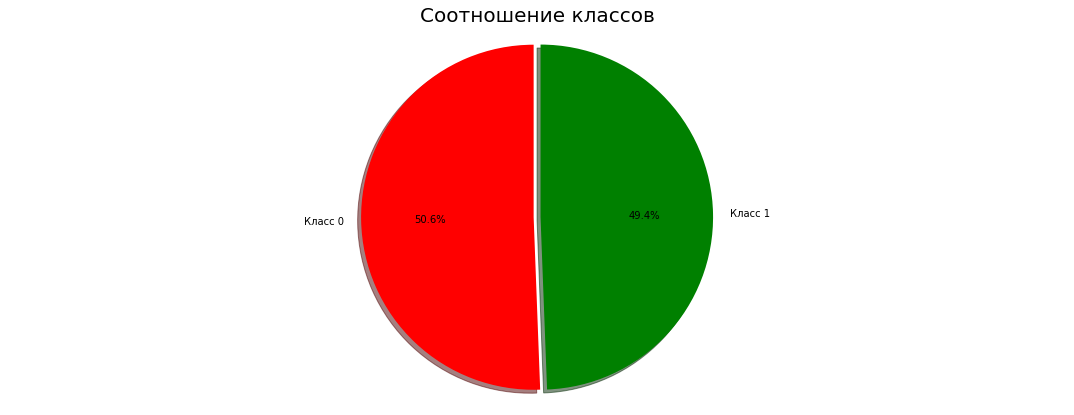

In [28]:
plt.figure(figsize=(19, 7))
labels = ['Класс 0','Класс 1']
values = target_upsampled.value_counts(normalize=True)
colors = ['red','green']
explode = [0.04,0]
plt.title('Соотношение классов', size=20)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: коэффициент увеличения выборки подобран верно!</div>

Обучим две модели дерева решений с разными методами баланса класса, первую с увелечением выборки меньшего класса:

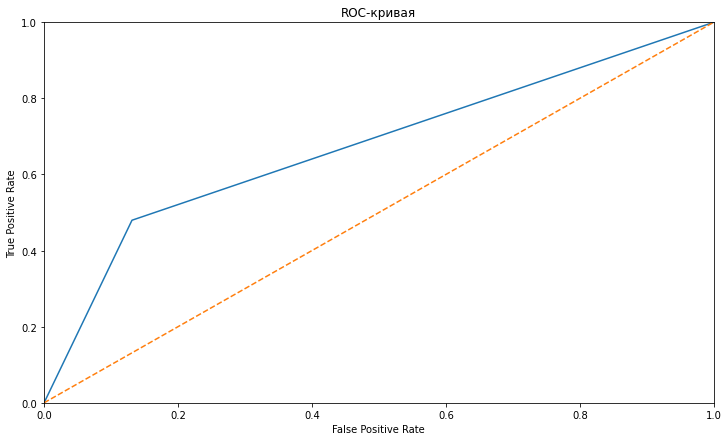

Accuracy: 0.8157315731573157 , глубина:  5
Площадь под кривой (AUC-ROC): 0.6742391079601443
Значение лучшей метрики F1: 0.6035502958579881
CPU times: user 1.73 s, sys: 7.91 ms, total: 1.74 s
Wall time: 1.75 s


In [29]:
%%time


best_model_tree = None
best_result_m3 = 0
best_depth = 0


for depth in range(1, 100, 2):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predicted_valid = model_tree.predict(features_valid)
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_m3 = f1_score(predicted_valid, target_valid)
    if result_m3 > best_result_m3:
        best_model_tree = model_tree
        best_result_m3 = result_m3
        best_depth = depth
            

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_m3 = best_model_tree.score(features_valid, target_valid)
roc_model_3 = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_m3, ", глубина: ", best_depth)
print('Площадь под кривой (AUC-ROC):', roc_model_3)
print('Значение лучшей метрики F1:', best_result_m3)

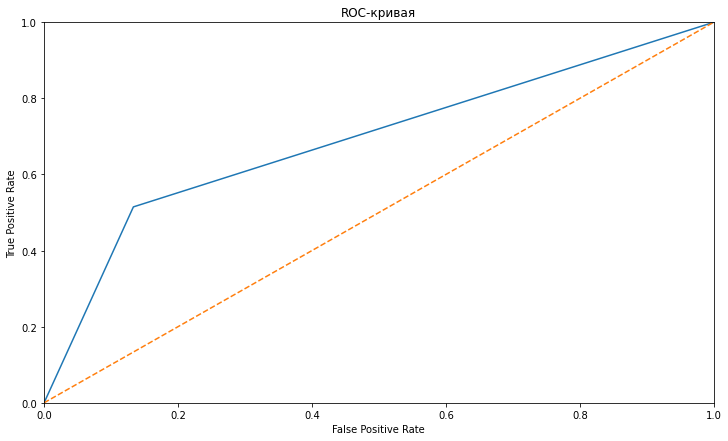

Accuracy: 0.8157315731573157 , глубина:  5
Площадь под кривой (AUC-ROC): 0.6907226960883844
Значение лучшей метрики F1: 0.6035502958579881
CPU times: user 1.46 s, sys: 15.9 ms, total: 1.48 s
Wall time: 1.48 s


In [30]:
%%time


best_model_tree = None
best_result_m4 = 0
best_depth = 0


for depth in range(1, 100, 2):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_tree.fit(features_train, target_train)
    predicted_valid = model_tree.predict(features_valid)
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_m4 = f1_score(predicted_valid, target_valid)
    if result_m4 > best_result_m4:
        best_model_tree = model_tree
        best_result_m4 = result_m4
        best_depth = depth
            

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_m4 = best_model_tree.score(features_valid, target_valid)
roc_model_4 = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_m4, ", глубина: ", best_depth)
print('Площадь под кривой (AUC-ROC):', roc_model_4)
print('Значение лучшей метрики F1:', best_result_m4)

Проделаем тоже самое для модели случайного леса:

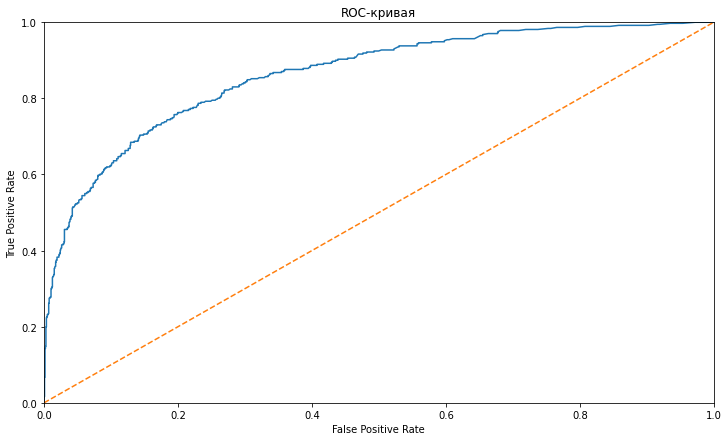

Accuracy: 0.834983498349835 , количество деревьев:  350 , глубина:  10
Площадь под кривой (AUC-ROC): 0.8626082032348739
Значение лучшей метрики F1: 0.6376811594202898
CPU times: user 1min 45s, sys: 360 ms, total: 1min 45s
Wall time: 1min 45s


In [31]:
%%time


best_model_forest = None
best_result_m5 = 0
best_n_estimators = 0
best_depth = 0


for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predicted_valid = model_forest.predict(features_valid)
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_m5 = f1_score(predicted_valid, target_valid)
        if result_m5 > best_result_m5:
            best_model_forest = model_forest
            best_result_m5 = result_m5
            best_n_estimators = est
            best_depth = depth
            

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_m5 = best_model_forest.score(features_valid, target_valid)
roc_model_5 = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_m5, ", количество деревьев: ",
      best_n_estimators, ", глубина: ", best_depth)
print('Площадь под кривой (AUC-ROC):', roc_model_5)
print('Значение лучшей метрики F1:', best_result_m5)

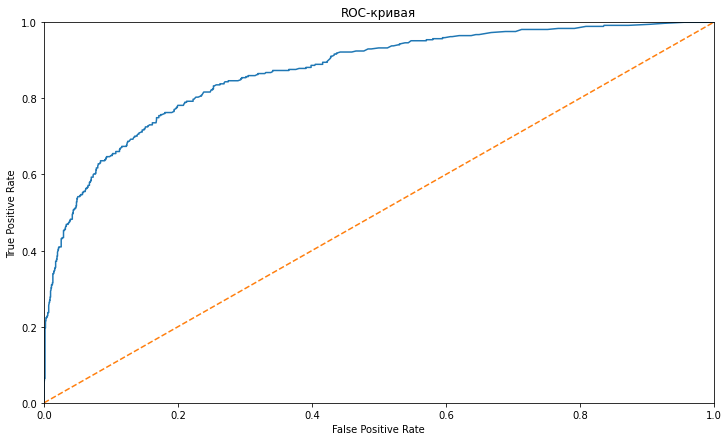

Accuracy: 0.8371837183718371 , количество деревьев:  350 , глубина:  8
Площадь под кривой (AUC-ROC): 0.8706655837805516
Значение лучшей метрики F1: 0.6318407960199004
CPU times: user 1min 16s, sys: 268 ms, total: 1min 17s
Wall time: 1min 17s


In [32]:
%%time


best_model_forest = None
best_result_m6 = 0
best_n_estimators = 0
best_depth = 0


for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        predicted_valid = model_forest.predict(features_valid)
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_m6 = f1_score(predicted_valid, target_valid)
        if result_m6 > best_result_m6:
            best_model_forest = model_forest
            best_result_m6 = result_m6
            best_n_estimators = est
            best_depth = depth
            

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_m6 = best_model_forest.score(features_valid, target_valid)
roc_model_6 = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_m6, ", количество деревьев: ",
      best_n_estimators, ", глубина: ", best_depth)
print('Площадь под кривой (AUC-ROC):', roc_model_6)
print('Значение лучшей метрики F1:', best_result_m6)

Тестирование на модели линейной регресси проводить не будем, поскольку для к датасету было применено порядковое кодирование. Двух моделей будет достаточно для решения данной задачи.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, только не хватает таблички с результатами, где будет название модели, примененный способ борьбы с дисбалансом, подобранные гиперпараметры и значения метрик F1 и AUC-ROC</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Подскажи пожаулуйста как можно было общие результаты красивее и информативнее визуализировать. Очень интересно, возьму на вооружение себе, а то это как-то топорно выглядит))

</div>

In [33]:
accuracy_results = [accuracy_m1, accuracy_m2, accuracy_m3,
                   accuracy_m4, accuracy_m5, accuracy_m6]

roc_aoc_results = [roc_model_1, roc_model_2, roc_model_3,
                   roc_model_4, roc_model_5, roc_model_6]

f1_results = [best_result_m1, best_result_m2, best_result_m3,
              best_result_m4, best_result_m5, best_result_m6]

columns = ['forest_disbalance', 'tree_disbalance', 'tree_balance_up', 
           'tree_balance_weight', 'forest_balance_up', 'forest_balance_weight']

all_results =  pd.DataFrame({'model_name': columns,
                             'f1': f1_results,
                             'roc_aoc' : roc_aoc_results,
                             'accuracy' : accuracy_results})

display(all_results.round(3).sort_values(by = 'f1', ascending=False))

,model_name,f1,roc_aoc,accuracy
4,forest_balance_up,0.638,0.863,0.835
5,forest_balance_weight,0.632,0.871,0.837
0,forest_disbalance,0.618,0.870,0.871
2,tree_balance_up,0.604,0.674,0.816
3,tree_balance_weight,0.604,0.691,0.816
1,tree_disbalance,0.544,0.693,0.848


**Вывод**: лучшей моделью для метрики F1 себя показал случайный лес c увеличением выборки. Худшей - лес без баланса классов. С ростом метрики F1 растёт площадь под ROC-кривой.

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: да вроде здорово получилось :) Но можно еще попробовать составлять ее автоматически. Самый простой вариант — это создать новый датафрейм перед обучением модели и написать функцию, которая будет добавлять в него указанные параметры. Получить название модели можно, например, так: `type(model).__name__` а гиперпараметры модели методом `get_params()`. Метрики ты уже считаешь, так что вручную останется передавать в эту функцию только название метода борьбы с дисбалансом

Еще можно попробовать выделить максимальное значение в каждой колонке, тут поможет метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.highlight_max.html" target="blank_">highlight_max</a>, например:
    
    df.style.highlight_max(color='yellow', axis = 0)
</div>

## Тестирование модели

Проведём финальное тестирование лучшей модели с учётом выявленных гиперпараметров.

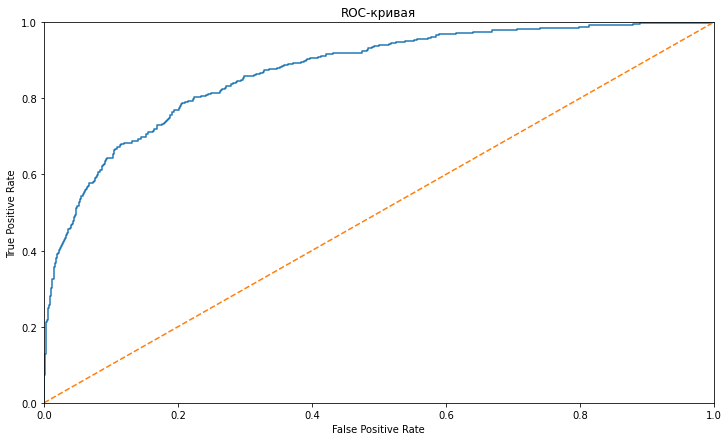

Accuracy: 0.8602860286028603
Площадь под кривой (AUC-ROC): 0.8704280815219517
Значение лучшей метрики F1: 0.6242603550295859
CPU times: user 2.43 s, sys: 4 ms, total: 2.43 s
Wall time: 2.43 s


In [34]:
%%time


model_forest = RandomForestClassifier(random_state=12345, n_estimators=350, max_depth=12, class_weight='balanced')
model_forest.fit(features_train, target_train)
predicted_valid = model_forest.predict(features_valid)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result_final = f1_score(predicted_valid, target_valid)
           

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_final = model_forest.score(features_valid, target_valid)
roc_model_final = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy:", accuracy_final)
print('Площадь под кривой (AUC-ROC):', roc_model_final)
print('Значение лучшей метрики F1:', result_final)

Проверим стабильноcть модели на тестовой выборке:

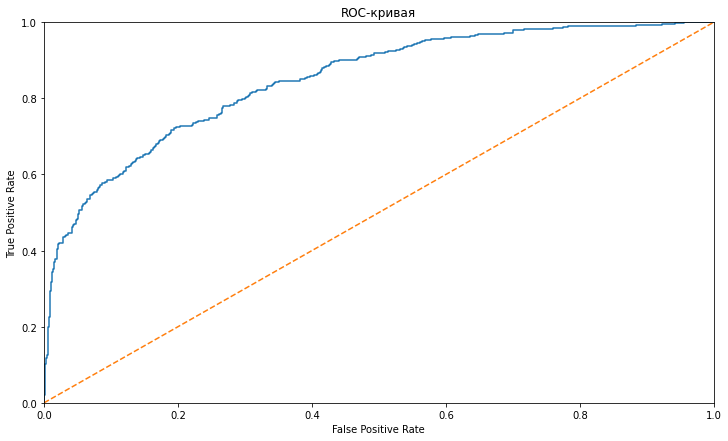

Accuracy: 0.8537658053875756
Площадь под кривой (AUC-ROC): 0.84767911125672
Значение лучшей метрики F1: 0.5945121951219512
CPU times: user 532 ms, sys: 3.97 ms, total: 536 ms
Wall time: 543 ms


In [35]:
%%time


predicted_test = model_forest.predict(features_test)
probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
result_test = f1_score(predicted_test, target_test)
            

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

accuracy_test = model_forest.score(features_test, target_test)
roc_model_test = roc_auc_score(target_test, probabilities_one_test)

print("Accuracy:", accuracy_test)
print('Площадь под кривой (AUC-ROC):', roc_model_test)
print('Значение лучшей метрики F1:', result_test)

In [36]:
print('Accuracy валидационной выборки:', accuracy_final)
print('Accuracy тестовой выборки:', accuracy_test)

Accuracy валидационной выборки: 0.8602860286028603
Accuracy тестовой выборки: 0.8537658053875756


Значение метрик `Accuracy` близки по значению, что свидетельствует о стабильности нашей модели.

Теперь проверим нашу модель на адекватность сравнив её с константной моделью:

In [37]:
target_constant = pd.Series(0, index=features_train.index)


model_constant = RandomForestClassifier(random_state=12345, n_estimators=350, max_depth=12, class_weight='balanced')
model_constant.fit(features_train, target_constant)
constant_results = model_constant.score(features_test, target_test)       
            
print("Accuracy константной модели:", constant_results)
print("Accuracy нашей лучшей модели:", accuracy_test)

if accuracy_test > constant_results:
    print('Вывод: наша модель адекватна')
else:
    print('Вывод: наша модель неадекватна')

Accuracy константной модели: 0.7960417811984607
Accuracy нашей лучшей модели: 0.8537658053875756
Вывод: наша модель адекватна


<div class="alert alert-info">
    <b>Комментарий студента:</b> нужно ли в константной модели задавать гиперпараметры как на нашей модели? Ещё вопрос логический, ведь проверка на адекватность не всегда объективна, например если как у нас число ответов класса 1 почти 79 % в выборке, следовательно иногда может попасть так что модель константная будет слишком высокую точность показывать..

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: как правило, проверяют на адекватность лучшую модель, поэтому гиперпараметры указывать точно стоит. А по поводу высокой точности у константной модели — именно так, а проблема как раз в accuracy, ровно по этой причине она и не используется для оценки моделей при дисбалансе. Поэтому здесь можно проверить не ее, а актуальные для нас в этом случае метрики, то есть F1 и AUC-ROC</div>

Вывод: мы построили модель с предельно большим значением F1-меры, учитвая при этом баланс классов в тренеровочной выборке. Мы выполнили условия поставленной задачи и довели метрику до значений превышающих 0.59. Наша модель выдаёт успешное значение 0.5945 на тестовой выборке.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: лайк за проверку на адекватность!</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: но здесь ячейка падает с ошибкой, перед следующей отправкой убедись, что проект полностью запускается в окружении Практикума, а ячейки расположены в порядке запуска</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: на тестовой выборке нельзя подбирать гиперпараметры(как и сравнивать модели или способы борьбы с дисбалансом), иначе она просто перестанет быть тестовой. Она нужна только для проверки лучшей модели по метрикам на валидационной выборке с уже подобранными гиперпараметрами и примененным способом борьбы с дисбалансом</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Все исправил. Можешь пожалуйста посоветовать от себя что-то полезное или развивающее, может какие-то полезные сайти, книги, каналы, советы или на что обратить внимание начинающему специалисту чтобы повысить свою эффективность?

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: тут зависит от того, что тебе кажется более нужным сейчас. Например, если хочется глубже разобраться с DS, то я всегда активно советую соревнования на <a href="https://www.kaggle.com/competitions">Kaggle</a>: помимо расширения кругозора, драгоценного опыта и наполнения своего портфолио, активность на Kaggle также часто ценится работодателями

А если хочется улучшить навыки написания кода, то есть два моих любимых ресурса для этого:
    
* https://www.codewars.com/ — платформа с задачами разного уровня сложности на десятках языках программирования. После отправки своего решения можно посмотреть на решения других пользователей и понять, что есть куда расти :)
* https://leetcode.com/ — похожая платформа, но здесь упор сделан на задачи с технических собеседований, в том числе задачи по алгоритмам и структурам данных
    
Подобные задачи развивают мышление программиста и неплохо тренируют навыки кодинга</div>

## Общий вывод

Мы смогли достичь успешного значения F1 > 0.59 на тестовой выборке, меняя гиперпараметры случайного леса. При этом можно увидеть прямопропорциональную зависимость метрики F1 от прощади под кривой AUC-ROC. Так же можно отметить, что баланс соотношения классов тренеровочной выборки влияет на значения ключевых метрик и повышает эффективность модели. Лучшим методом баланса класса показало себя увеличение меньшего класса выборки до соотношения 1:1.

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый и структурированный проект, спасибо, такие всегда приятно проверять!

Но тебе обязательно нужно обратить внимание на следующее:
* для подбора гиперпараметров нужно использовать основную метрику, в нашем случае это F1-мера;
* перепроверь наличие выводов и пояснений на каждом этапе;
* убедись, что проект полностью запускается в окружении Практикума;
* не используй тестовую выборку для подбора гиперпараметров;

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Теперь то, что нужно, молодец!

Все критичные замечания исправлены, и теперь я могу принять твою работу :)

<b>Успехов в обучении!</b>
        
</div>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*